In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nikhil7280_student_performance_multiple_linear_regression_path = kagglehub.dataset_download('nikhil7280/student-performance-multiple-linear-regression')

print('Data source import complete.')


Data source import complete.


Loading libraries and data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [4]:
# read data set

data = pd.read_excel("/content/merged_file.xlsx")

In [5]:
# see top 5 rows

data.head()

,Roll No.,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,gender,parental level of education,lunch,...,PlaceofBirth,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,7,99,Yes,9,1,91,female,bachelor's degree,standard,...,KuwaIT,F,Father,15,16,2,20,Yes,Good,Under-7
1,2,4,82,No,4,2,65,female,some college,standard,...,KuwaIT,F,Father,20,20,3,25,Yes,Good,Under-7
2,3,8,51,Yes,7,2,45,female,master's degree,standard,...,KuwaIT,F,Father,10,7,0,30,No,Bad,Above-7
3,4,5,52,Yes,5,2,36,male,associate's degree,free/reduced,...,KuwaIT,F,Father,30,25,5,35,No,Bad,Above-7
4,5,7,75,No,8,5,66,male,some college,standard,...,KuwaIT,F,Father,40,50,12,50,No,Bad,Above-7


In [6]:
# see column data type and some info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Roll No.                          10000 non-null  int64 
 1   Hours Studied                     10000 non-null  int64 
 2   Previous Scores                   10000 non-null  int64 
 3   Extracurricular Activities        10000 non-null  object
 4   Sleep Hours                       10000 non-null  int64 
 5   Sample Question Papers Practiced  10000 non-null  int64 
 6   Performance Index                 10000 non-null  int64 
 7   gender                            10000 non-null  object
 8   parental level of education       10000 non-null  object
 9   lunch                             10000 non-null  object
 10  test preparation course           10000 non-null  object
 11  math score                        10000 non-null  int64 
 12  reading score      

In [7]:
# see precentege of missing value in each column

data.isna().sum() / data.shape[0]

,0
Roll No.,0.0
Hours Studied,0.0
Previous Scores,0.0
Extracurricular Activities,0.0
Sleep Hours,0.0
Sample Question Papers Practiced,0.0
Performance Index,0.0
gender,0.0
parental level of education,0.0
lunch,0.0


In [8]:
# see dimensions

data.shape

(10000, 25)

In [9]:
# check if duplicated in data

data.duplicated().any()

np.False_

In [10]:
# Remove duplicate rows
data = data.drop_duplicates()

# Optional: To reset the index after removing duplicates
data = data.reset_index(drop=True)


In [12]:
# Count duplicates before removing
duplicates = data.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")


Total duplicate rows: 0


In [13]:
# see quick info of numeric values

data.describe()

,Roll No.,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,math score,reading score,writing score,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,4.992900,69.445700,6.530600,4.583300,55.224800,66.089000,69.16900,68.054000,46.639200,54.652100,37.801100,43.228000
std,2886.89568,2.589309,17.343152,1.695863,2.867348,19.212558,15.156254,14.59362,15.188817,30.731093,33.041717,26.541918,27.590302
min,1.00000,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000,17.00000,10.000000,0.000000,0.000000,0.000000,1.000000
25%,2500.75000,3.000000,54.000000,5.000000,2.000000,40.000000,57.000000,59.00000,57.750000,15.000000,20.000000,14.000000,20.000000
50%,5000.50000,5.000000,69.000000,7.000000,5.000000,55.000000,66.000000,70.00000,69.000000,50.000000,65.000000,33.000000,39.000000
75%,7500.25000,7.000000,85.000000,8.000000,7.000000,71.000000,77.000000,79.00000,79.000000,75.000000,84.000000,58.000000,70.000000
max,10000.00000,9.000000,99.000000,9.000000,9.000000,100.000000,100.000000,100.00000,100.000000,100.000000,99.000000,98.000000,99.000000


In [14]:
# see quick info of category values

data.describe(include = object)

,Extracurricular Activities,gender,parental level of education,lunch,test preparation course,NationalITy,PlaceofBirth,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,6,2,2,14,14,2,2,2,2,2
top,No,female,some college,standard,none,KW,KuwaIT,F,Father,Yes,Good,Under-7
freq,5052,5180,2260,6450,6420,3759,3780,5105,5899,5616,6070,6019


Univariate analysis and visualisation

In [15]:
# create function to visualized categorical column using count plot

def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [16]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()


📊 Feature: Roll No.


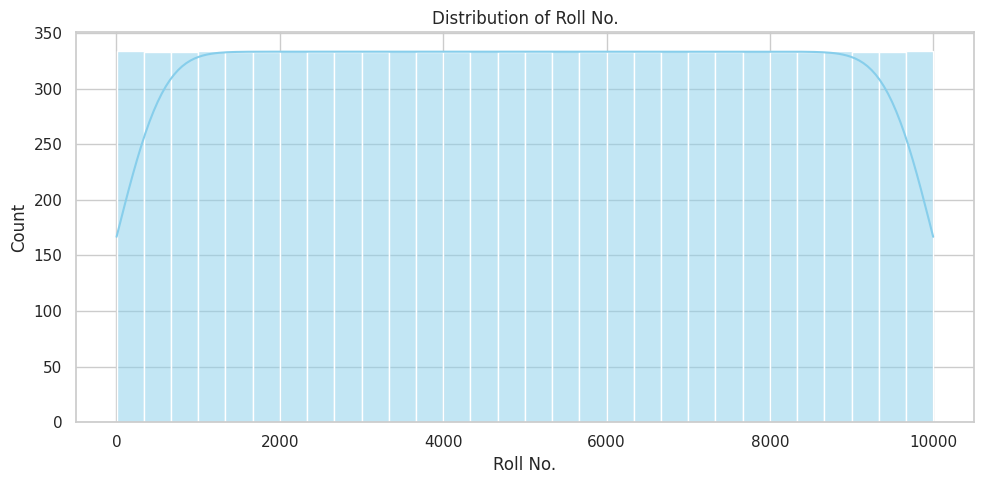

• Mean value: 5000.50. Range: 1 to 10000.
• Standard deviation: 2886.90.

📊 Feature: Hours Studied


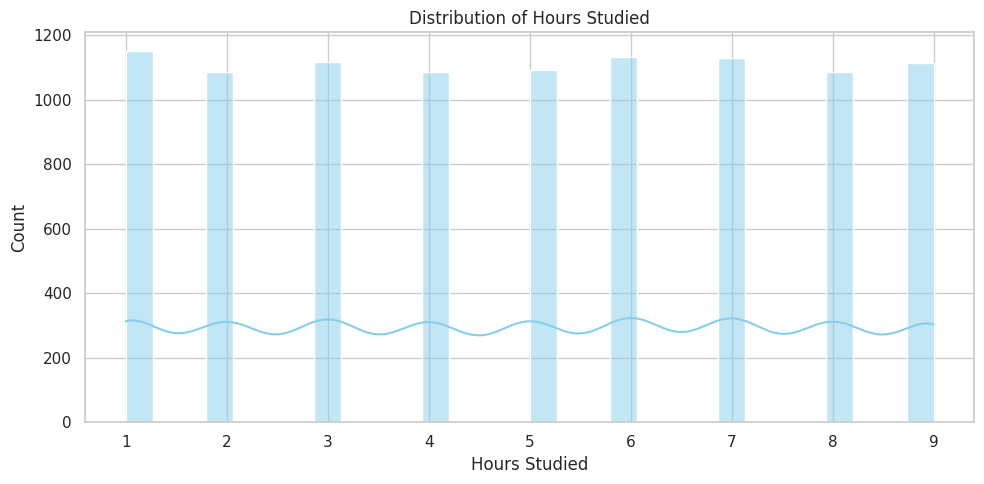

• Mean value: 4.99. Range: 1 to 9.
• Standard deviation: 2.59.

📊 Feature: Previous Scores


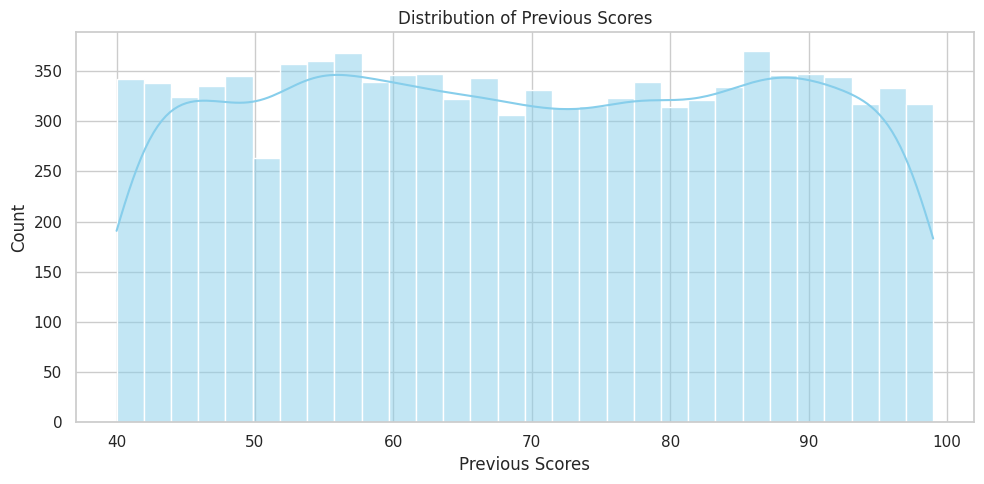

• Mean value: 69.45. Range: 40 to 99.
• Standard deviation: 17.34.

📊 Feature: Extracurricular Activities


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


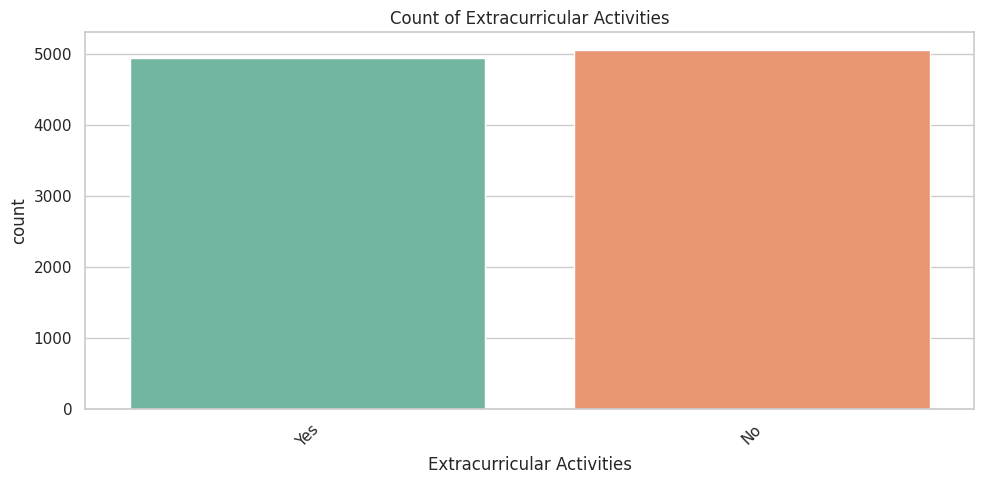

• The most common value is 'No' with 5052 occurrences.
• There are 2 unique values in 'Extracurricular Activities'.

📊 Feature: Sleep Hours


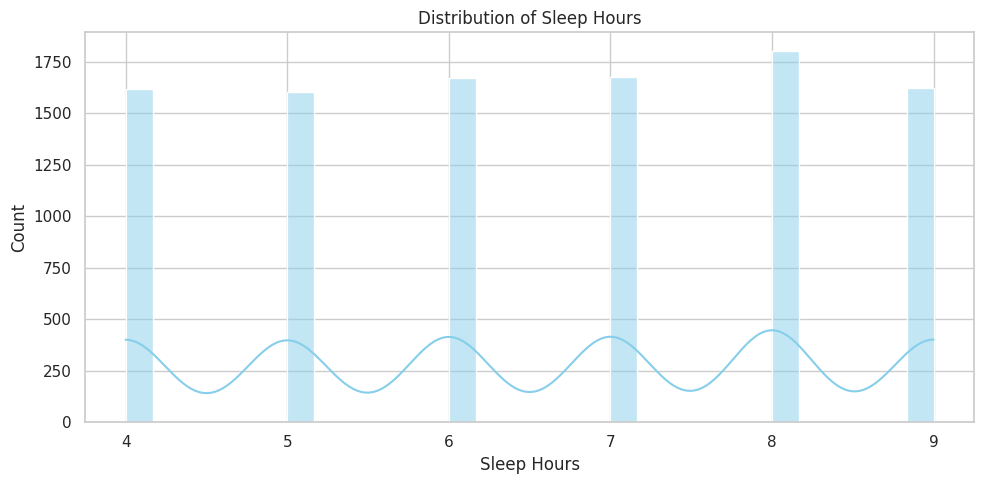

• Mean value: 6.53. Range: 4 to 9.
• Standard deviation: 1.70.

📊 Feature: Sample Question Papers Practiced


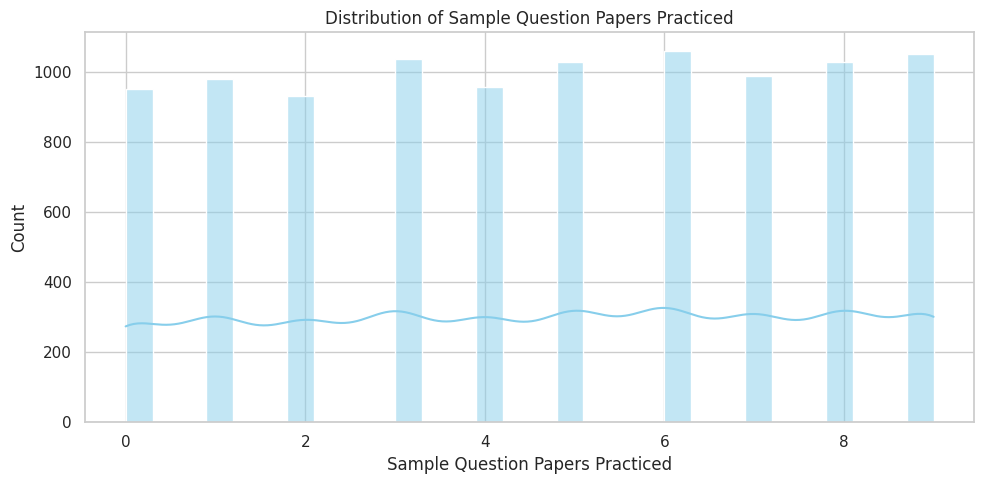

• Mean value: 4.58. Range: 0 to 9.
• Standard deviation: 2.87.

📊 Feature: Performance Index


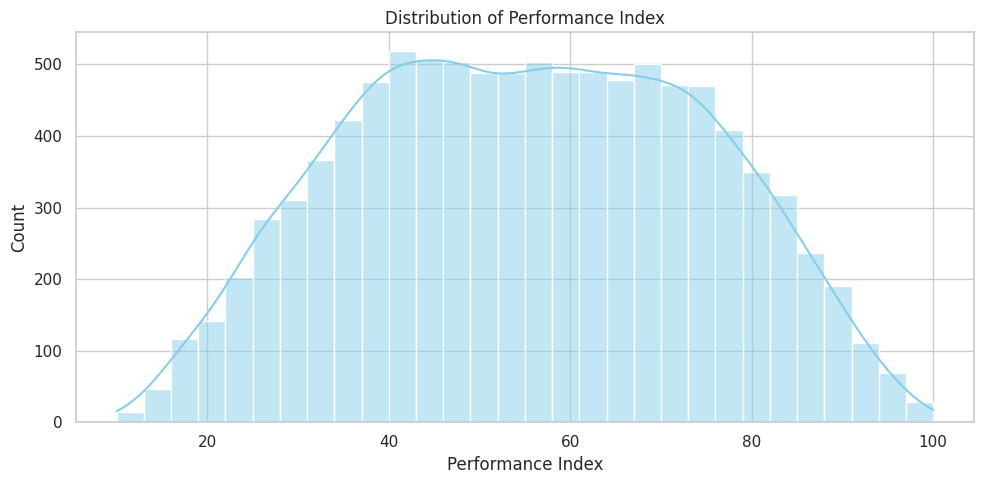

• Mean value: 55.22. Range: 10 to 100.
• Standard deviation: 19.21.

📊 Feature: gender


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


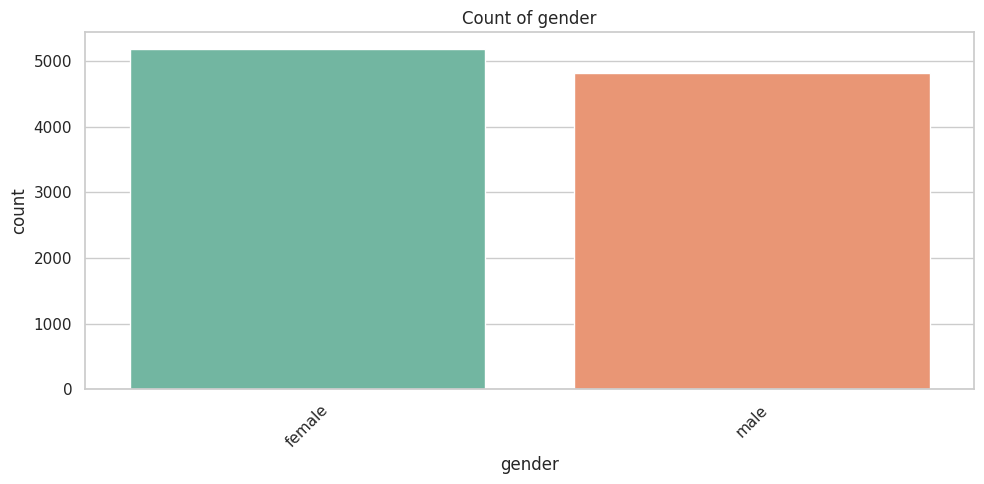

• The most common value is 'female' with 5180 occurrences.
• There are 2 unique values in 'gender'.

📊 Feature: parental level of education


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


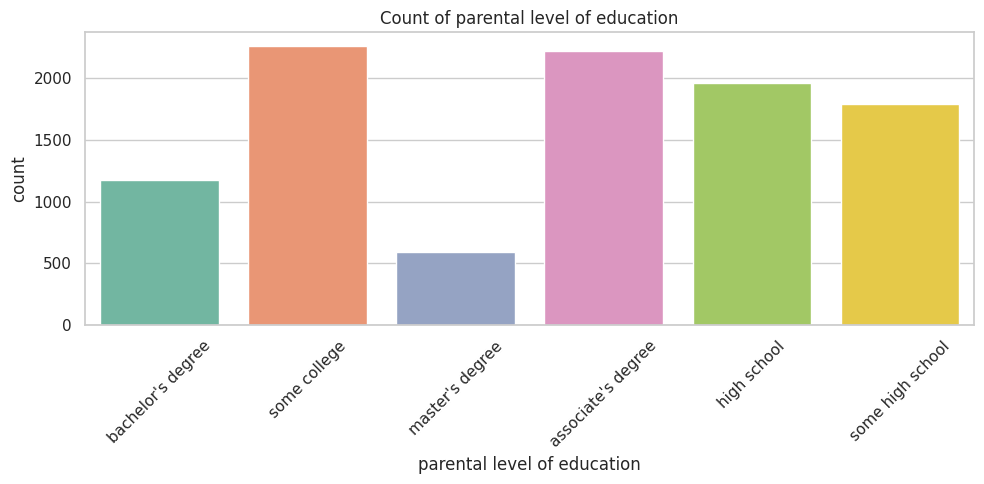

• The most common value is 'some college' with 2260 occurrences.
• There are 6 unique values in 'parental level of education'.

📊 Feature: lunch


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


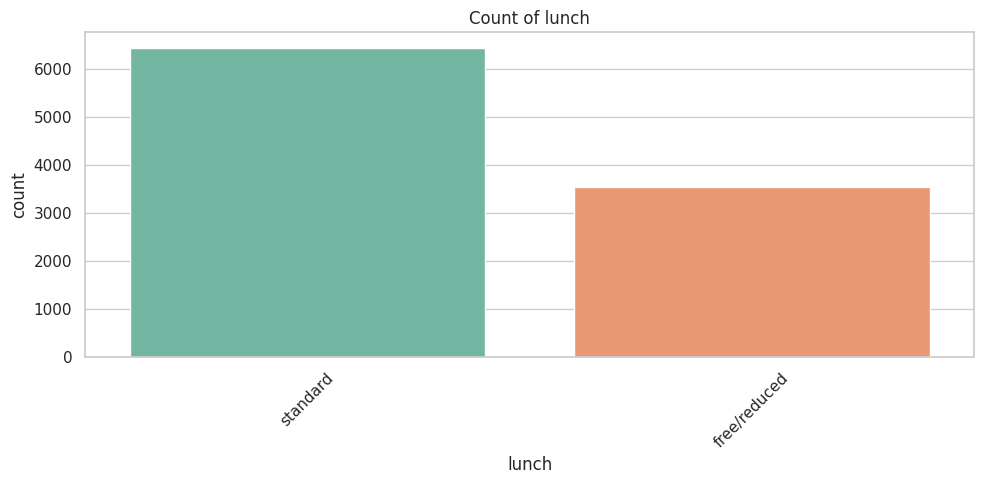

• The most common value is 'standard' with 6450 occurrences.
• There are 2 unique values in 'lunch'.

📊 Feature: test preparation course


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


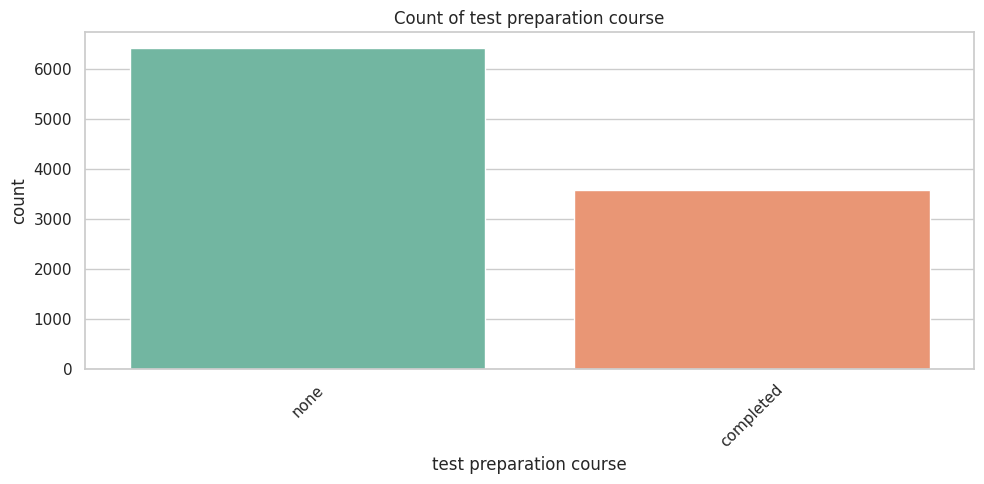

• The most common value is 'none' with 6420 occurrences.
• There are 2 unique values in 'test preparation course'.

📊 Feature: math score


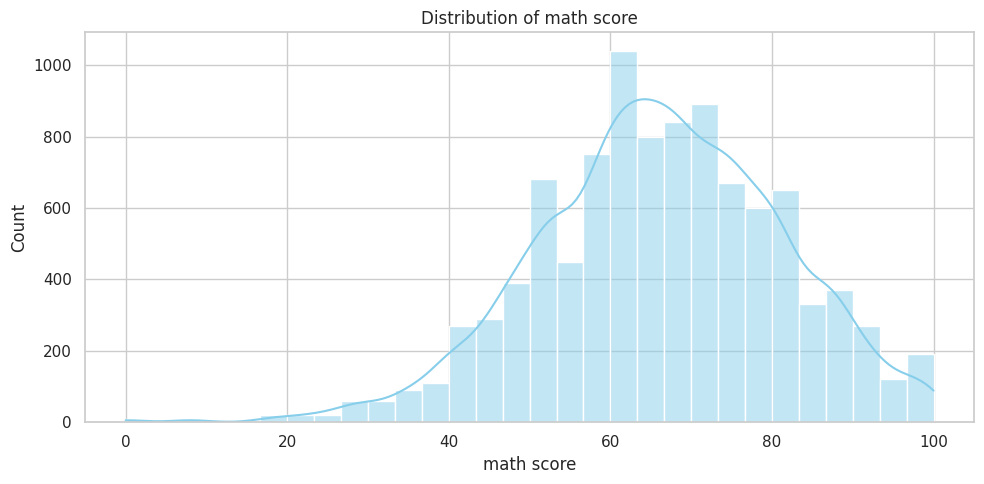

• Mean value: 66.09. Range: 0 to 100.
• Standard deviation: 15.16.

📊 Feature: reading score


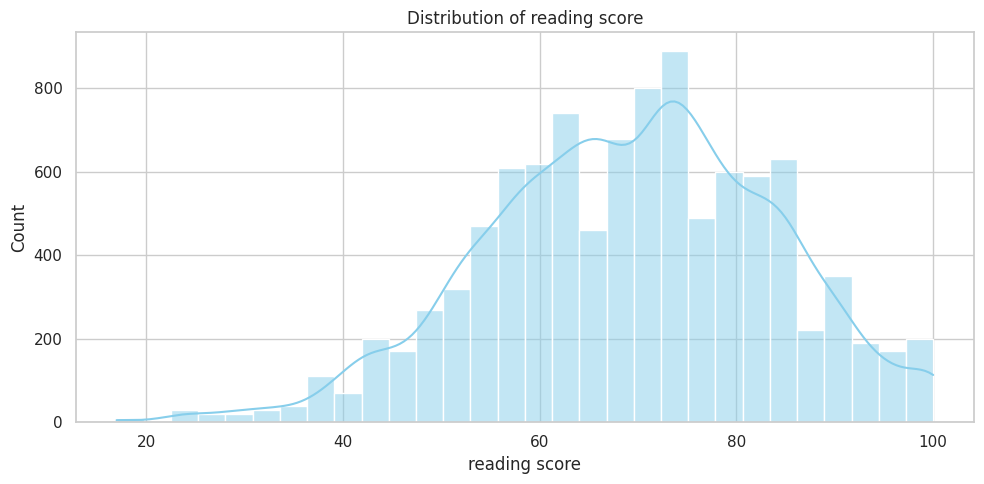

• Mean value: 69.17. Range: 17 to 100.
• Standard deviation: 14.59.

📊 Feature: writing score


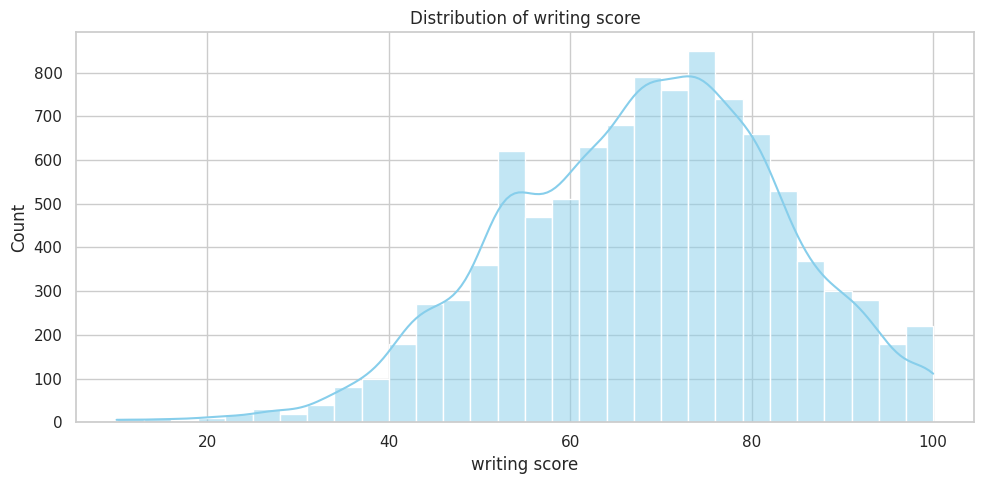

• Mean value: 68.05. Range: 10 to 100.
• Standard deviation: 15.19.

📊 Feature: NationalITy


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


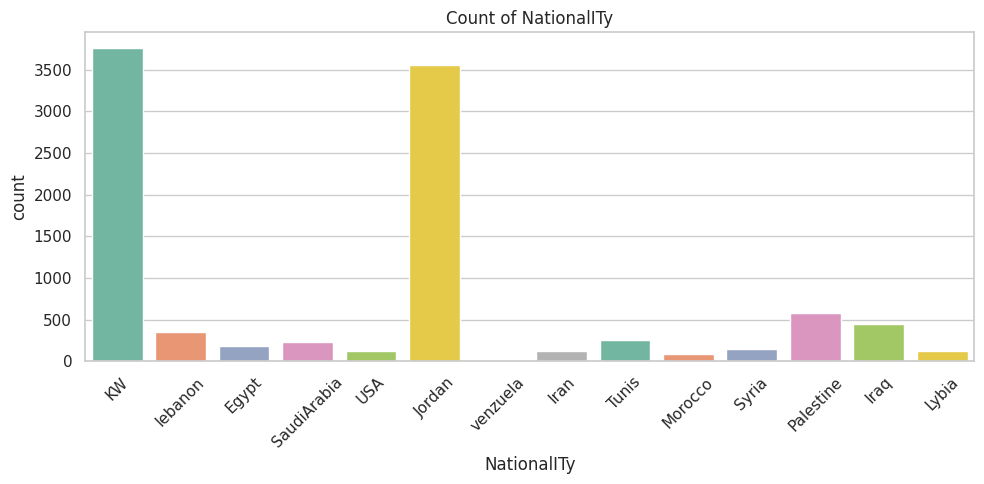

• The most common value is 'KW' with 3759 occurrences.
• There are 14 unique values in 'NationalITy'.

📊 Feature: PlaceofBirth


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


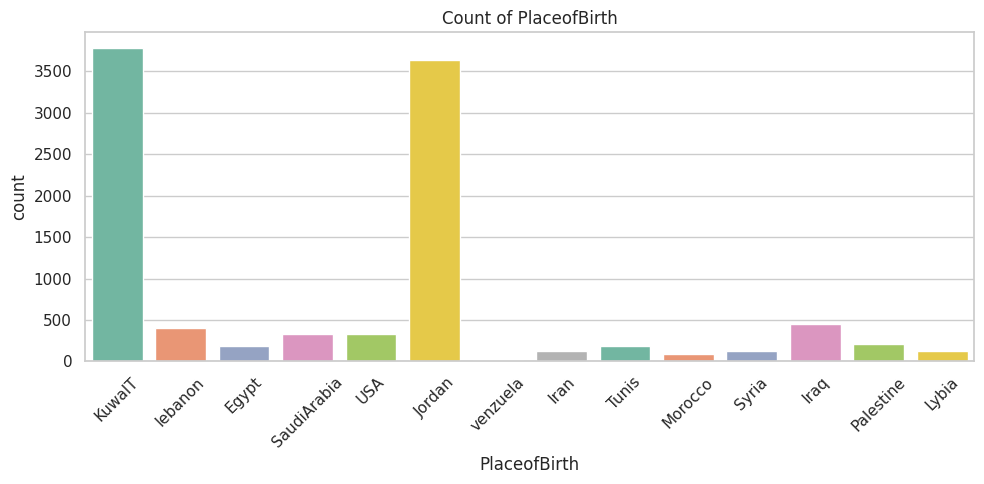

• The most common value is 'KuwaIT' with 3780 occurrences.
• There are 14 unique values in 'PlaceofBirth'.

📊 Feature: Semester


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


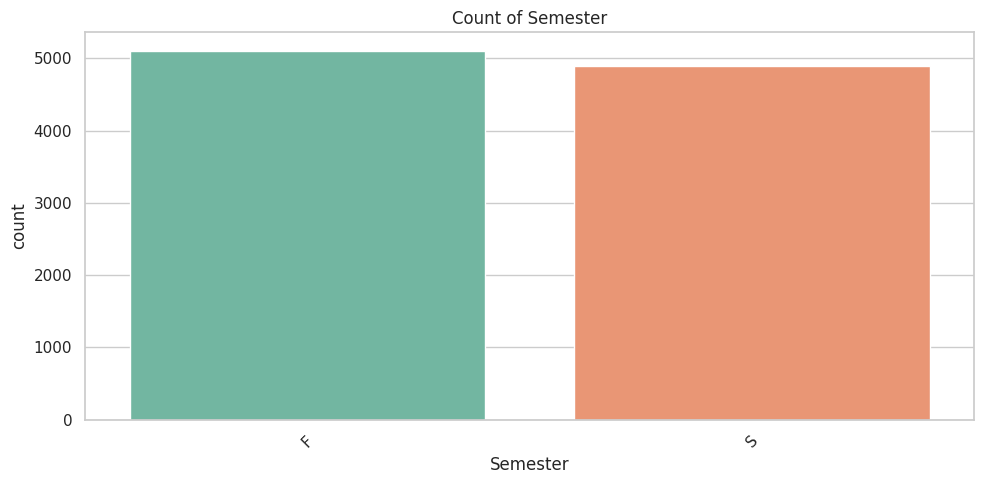

• The most common value is 'F' with 5105 occurrences.
• There are 2 unique values in 'Semester'.

📊 Feature: Relation


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


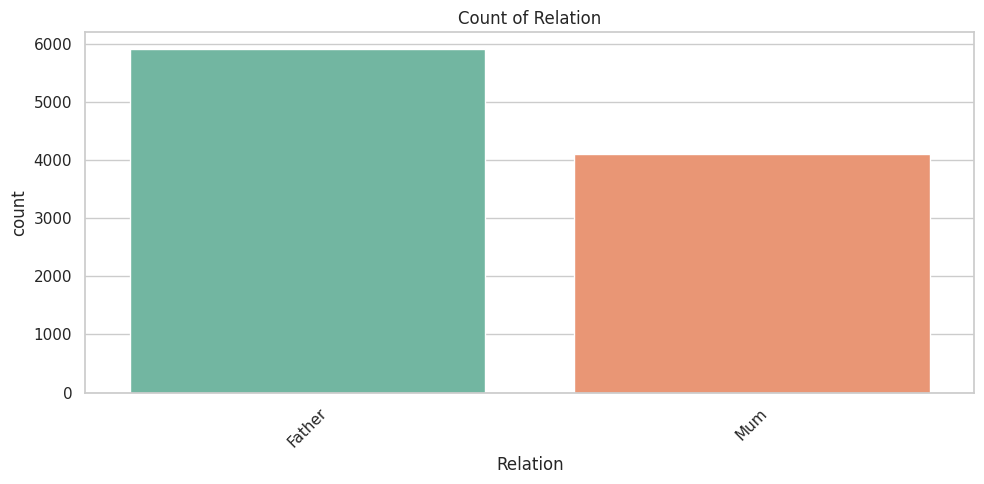

• The most common value is 'Father' with 5899 occurrences.
• There are 2 unique values in 'Relation'.

📊 Feature: raisedhands


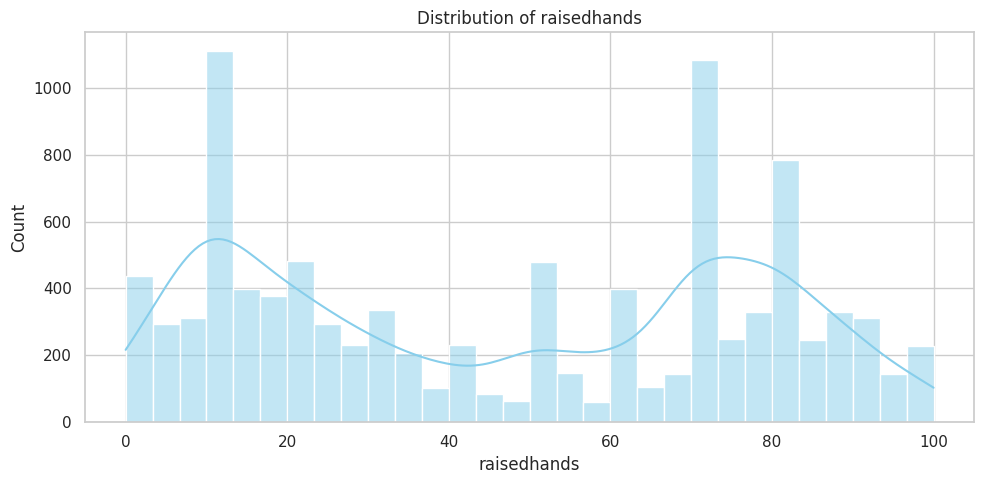

• Mean value: 46.64. Range: 0 to 100.
• Standard deviation: 30.73.

📊 Feature: VisITedResources


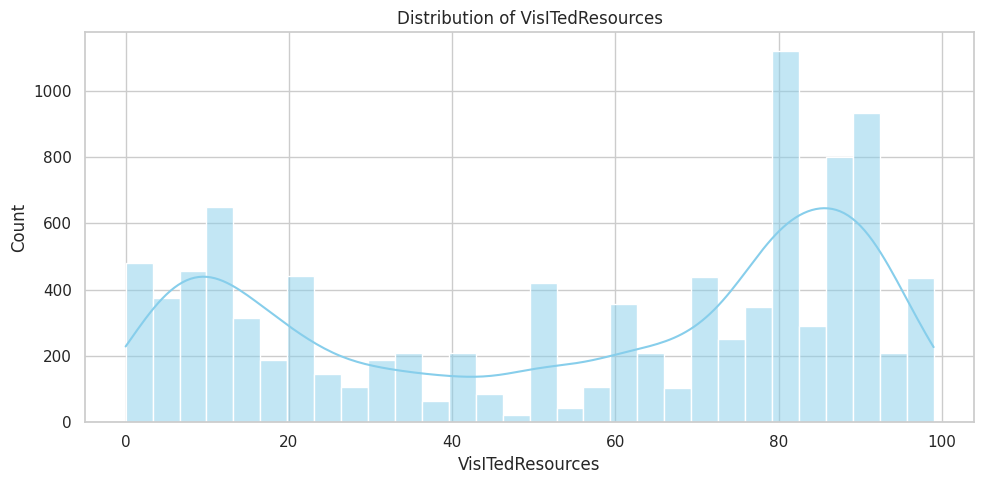

• Mean value: 54.65. Range: 0 to 99.
• Standard deviation: 33.04.

📊 Feature: AnnouncementsView


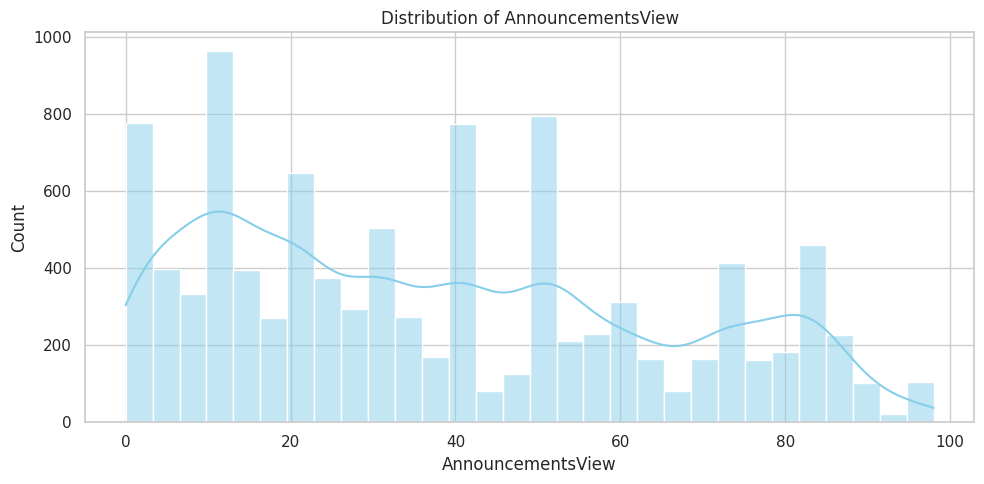

• Mean value: 37.80. Range: 0 to 98.
• Standard deviation: 26.54.

📊 Feature: Discussion


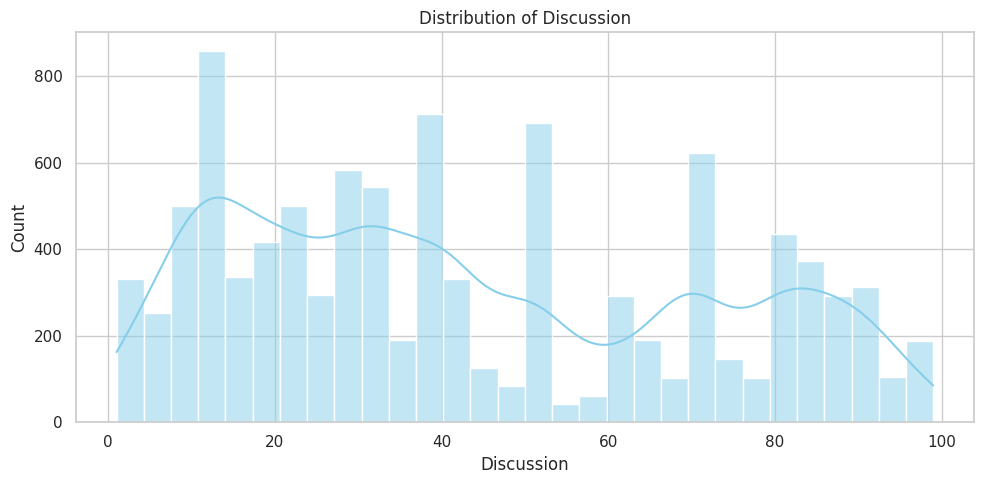

• Mean value: 43.23. Range: 1 to 99.
• Standard deviation: 27.59.

📊 Feature: ParentAnsweringSurvey


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


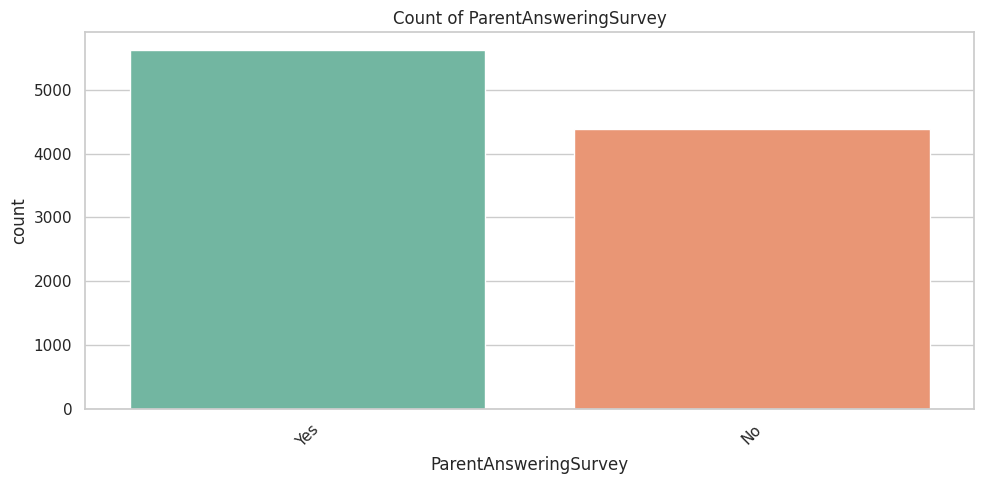

• The most common value is 'Yes' with 5616 occurrences.
• There are 2 unique values in 'ParentAnsweringSurvey'.

📊 Feature: ParentschoolSatisfaction


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


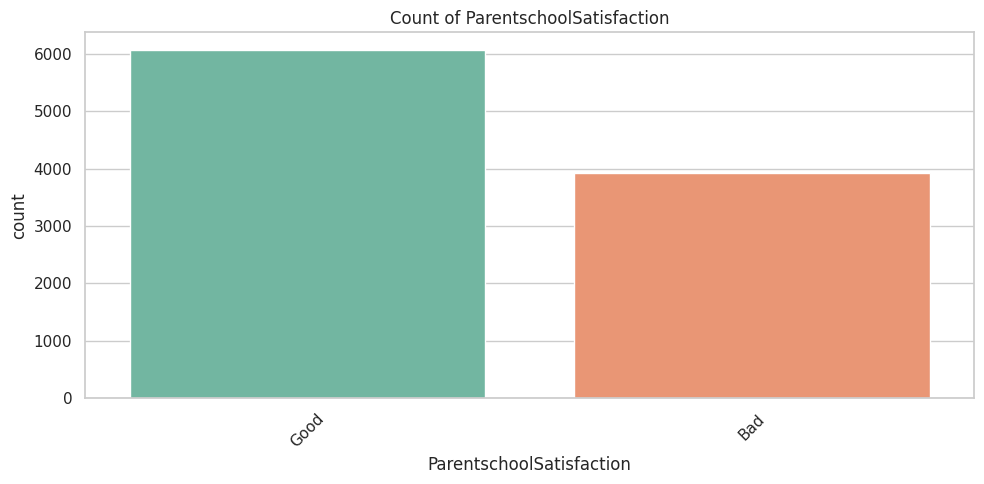

• The most common value is 'Good' with 6070 occurrences.
• There are 2 unique values in 'ParentschoolSatisfaction'.

📊 Feature: StudentAbsenceDays


<ipython-input-32-988770354b49>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


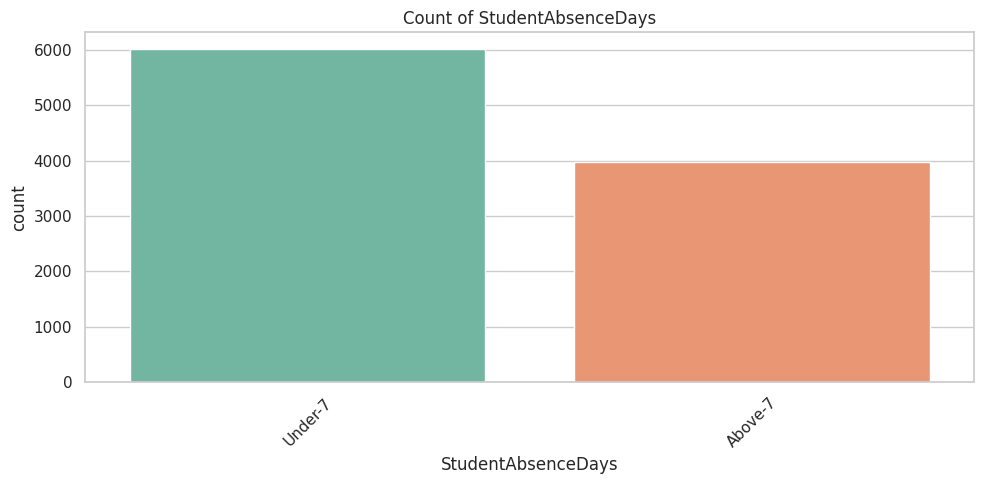

• The most common value is 'Under-7' with 6019 occurrences.
• There are 2 unique values in 'StudentAbsenceDays'.


In [32]:

# Plot style
sns.set(style="whitegrid")

# Loop through each column
for column in data.columns:
    plt.figure(figsize=(10, 5))

    print(f"\n📊 Feature: {column}")

    if data[column].dtype == 'object':
        # Categorical column
        sns.countplot(x=column, data=data, palette='Set2')
        plt.title(f"Count of {column}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Summary
        most_common = data[column].value_counts().idxmax()
        count = data[column].value_counts().max()
        unique = data[column].nunique()
        print(f"• The most common value is '{most_common}' with {count} occurrences.")
        print(f"• There are {unique} unique values in '{column}'.")

    else:
        # Numerical column
        sns.histplot(data[column], kde=True, bins=30, color='skyblue')
        plt.title(f"Distribution of {column}")
        plt.tight_layout()
        plt.show()

        # Summary
        mean = data[column].mean()
        max_val = data[column].max()
        min_val = data[column].min()
        print(f"• Mean value: {mean:.2f}. Range: {min_val} to {max_val}.")
        print(f"• Standard deviation: {data[column].std():.2f}.")


Heatmap

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


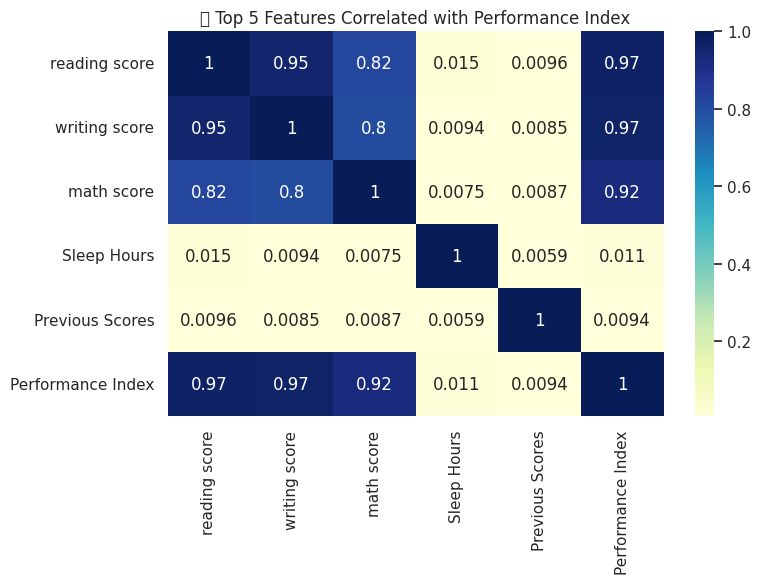

'reading score' is positively correlated with performance (correlation = 0.97).
'writing score' is positively correlated with performance (correlation = 0.97).
'math score' is positively correlated with performance (correlation = 0.92).
'Sleep Hours' is positively correlated with performance (correlation = 0.01).
'Previous Scores' is positively correlated with performance (correlation = 0.01).


In [40]:


# Choose a target column for performance (e.g., average of scores or math score)
data['Performance Index'] = data[['math score', 'reading score', 'writing score',]].mean(axis=1)

# Get correlation with performance
correlations = data.corr(numeric_only=True)['Performance Index'].drop('Performance Index')
top5 = correlations.abs().sort_values(ascending=False).head(5)

# Plot heatmap for top 5 correlated features
plt.figure(figsize=(8, 5))
sns.heatmap(data[top5.index.to_list() + ['Performance Index']].corr(), annot=True, cmap='YlGnBu')
plt.title("🔍 Top 5 Features Correlated with Performance Index")
plt.show()
for feature in top5.index:
    corr_value = correlations[feature]
    trend = "positively" if corr_value > 0 else "negatively"
    print(f"'{feature}' is {trend} correlated with performance (correlation = {corr_value:.2f}).")



Data Preprocessing

In [42]:
# import libraries to model

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
# create object from labelencoder

encoder = LabelEncoder()

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])
# see sample of data

data.sample(2)
# Splitting data into Indipendent and Dependent Variable

Train = data.drop(columns = "Performance Index")
Target = data["Performance Index"]
# see sample of train data

Train.sample(3)
# see sample of target label

Target
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (8000, 24)
y_train shape:  (8000,)
x_test shape:  (2000, 24)
y_test shape:  (2000,)


In [43]:
pip install pandas numpy scikit-learn xgboost matplotlib seaborn

Modeling

1.Linear regression

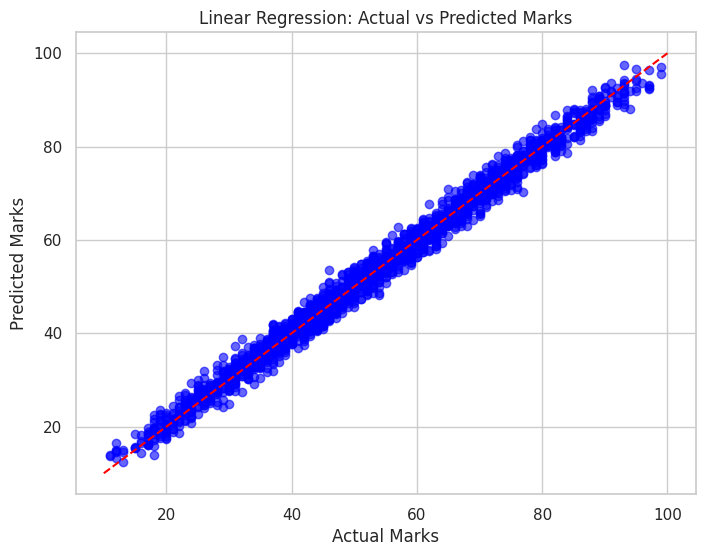

🔷 Linear Regression Results 🔷
Mean Squared Error (MSE): 4.11


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_excel("/content/merged_file.xlsx")

# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define Features (X) and Target Variable (Y)
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='dashed')  # Ideal line
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Linear Regression: Actual vs Predicted Marks")
plt.show()

print("="*40)
print("🔷 Linear Regression Results 🔷")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print("="*40)


2.Random forest regressor

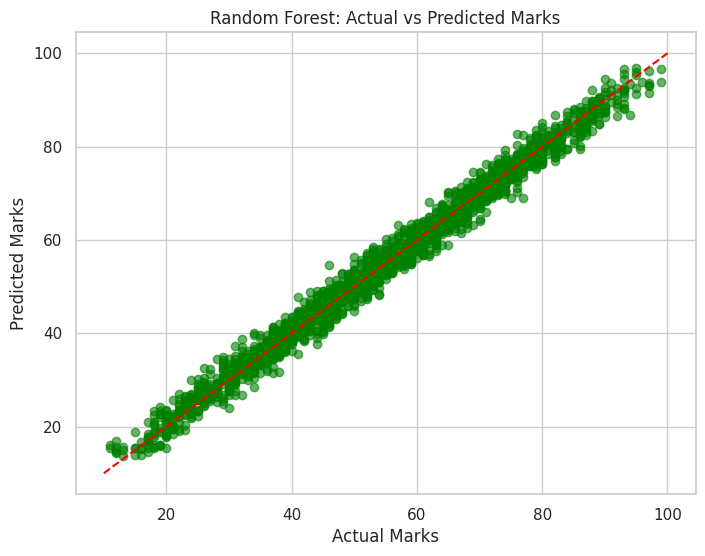

🔷 Random Forest Regressor Results 🔷
Mean Squared Error (MSE): 5.23


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# Load dataset
df = pd.read_excel("/content/merged_file.xlsx")

# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define Features (X) and Target Variable (Y)
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='dashed')  # Ideal line
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Random Forest: Actual vs Predicted Marks")
plt.show()

print("="*40)
print("🔷 Random Forest Regressor Results 🔷")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print("="*40)


3.Desicion tree classifier

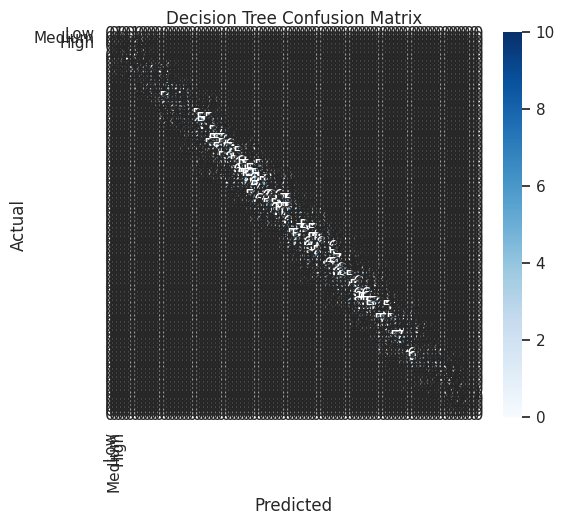

🔷 Decision Tree Classifier Results 🔷
Accuracy: 10.70%


In [46]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("="*40)
print("🔷 Decision Tree Classifier Results 🔷")
print(f"Accuracy: {accuracy:.2%}")
print("="*40)


4.XGBoost

In [48]:
!pip install xgboost
import xgboost as xgb # Import the XGBoost library and assign it to the alias 'xgb'

from sklearn.preprocessing import LabelEncoder

# Convert Marks into Categories
def categorize_marks(marks):
    if marks >= 85:
        return "High"
    elif marks >= 50:
        return "Medium"
    else:
        return "Low"

# Apply categorization
y_class = df['Performance Index'].apply(categorize_marks)

# Encode categorical labels into integers
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Split the data
y_train_class, y_test_class = train_test_split(y_class_encoded, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') # Use 'xgb' to access XGBClassifier
xgb_model.fit(X_train, y_train_class)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Accuracy
accuracy_xgb = accuracy_score(y_test_class, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2%}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:06:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 95.35%


Comparing the ML classification models

Linear Regression MSE: 4.11
Random Forest Regressor MSE: 5.23
Decision Tree Classifier Accuracy: 92.30%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 95.35%


<ipython-input-50-b9e91310dfa1>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, ax=ax[0], palette="coolwarm")
<ipython-input-50-b9e91310dfa1>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_values, ax=ax[1], palette="viridis")


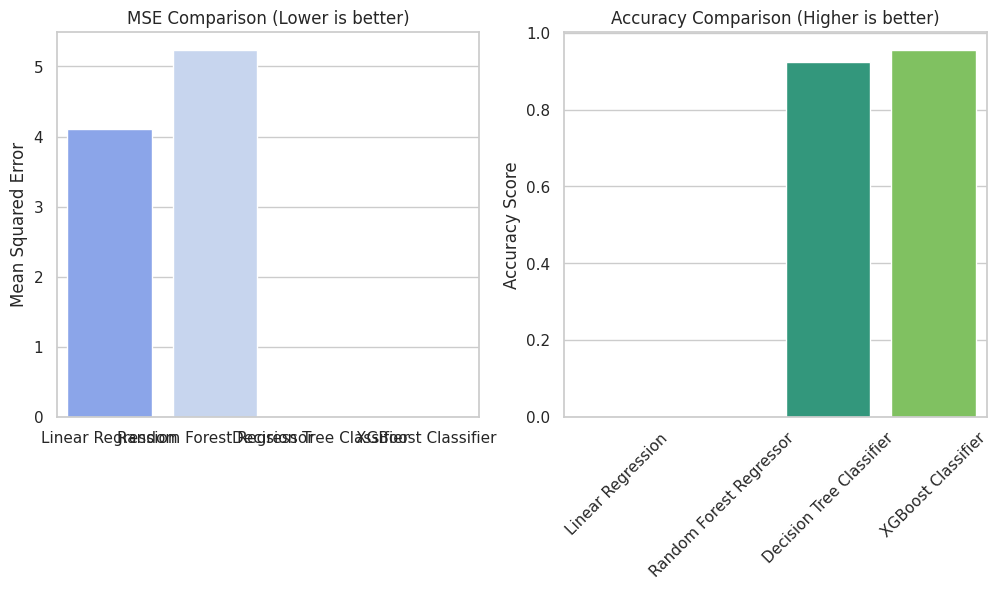

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Load preprocessed dataset (Make sure to replace 'your_dataset.csv' with the actual file)
df = pd.read_excel("/content/merged_file.xlsx")

# Convert Categorical Data into Numbers
categorical_columns = df.select_dtypes(include=['object']).columns  # Identify non-numeric columns

if len(categorical_columns) > 0:
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])  # Convert text to numbers

# Define Features (X) and Target Variable (Y)
X = df.drop(columns=['Performance Index'])  # Remove target column
y = df['Performance Index']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model 1: Linear Regression ###
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}")

### Model 2: Random Forest Regressor ###
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf:.2f}")

### Convert Marks into Performance Categories (Low, Medium, High) ###
def categorize_marks(marks):
    if marks >= 85:
        return "High"
    elif marks >= 50:
        return "Medium"
    else:
        return "Low"

y_class = df['Performance Index'].apply(categorize_marks)

# Convert categorical labels into numeric values
label_encoder_y = LabelEncoder()
y_class = label_encoder_y.fit_transform(y_class)

# Split the classification target
y_train_class, y_test_class = train_test_split(y_class, test_size=0.2, random_state=42)

### Model 3: Decision Tree Classifier ###
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train_class)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test_class, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.2%}")

### Model 4: XGBoost Classifier ###
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_class)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test_class, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2%}")

### Comparing Results ###
models = ["Linear Regression", "Random Forest Regressor", "Decision Tree Classifier", "XGBoost Classifier"]
mse_values = [mse_lr, mse_rf, None, None]  # MSE for regression models only
accuracy_values = [None, None, accuracy_dt, accuracy_xgb]  # Accuracy for classification models only

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=models, y=mse_values, ax=ax[0], palette="coolwarm")
ax[0].set_title("MSE Comparison (Lower is better)")
ax[0].set_ylabel("Mean Squared Error")

sns.barplot(x=models, y=accuracy_values, ax=ax[1], palette="viridis")
ax[1].set_title("Accuracy Comparison (Higher is better)")
ax[1].set_ylabel("Accuracy Score")

plt.xticks(rotation=45)
plt.show()


Fine tunning-XGBoost

In [51]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid for tuning XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train_class)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2%}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:11:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy: 95.74%


Saving the model

In [52]:
import joblib
import xgboost as xgb

# Train the final model with the best parameters from Grid Search
best_xgb = xgb.XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='mlogloss')
best_xgb.fit(X_train, y_train_class)

# Save the trained model
joblib.dump(best_xgb, "xgboost_model.pkl")
print("Model saved successfully as 'xgboost_model.pkl'")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model saved successfully as 'xgboost_model.pkl'


Loading the model

In [2]:
import joblib

# Load the trained XGBoost model
best_xgb = joblib.load("xgboost_model.pkl")
print("Model loaded successfully!")

Model loaded successfully!


user interaction

In [1]:
import pandas as pd

# Load dataset
data = pd.read_excel('/content/merged_file.xlsx')

# Calculate Performance Index
if 'Performance Index' not in data.columns:
    data['Performance Index'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

# Categorize student performance
def categorize_performance(index):
    if index >= 85:
        return 'High'
    elif index >= 50:
        return 'Medium'
    else:
        return 'Low'

# Apply performance category to all students
data['Performance Category'] = data['Performance Index'].apply(categorize_performance)

# Suggestion function
def suggest_improvements(row):
    suggestions = []
    if row['Performance Category'] != 'High':
        if row.get('Hours Studied', 0) < 3:
            suggestions.append("🔹 Increase study hours to at least 3 per day.")
        if row.get('Sleep Hours', 0) < 6:
            suggestions.append("🔹 Sleep at least 6-8 hours a day for better focus.")
        if row.get('Sample Question Papers Practiced', 0) < 3:
            suggestions.append("🔹 Solve at least 3-5 sample papers weekly.")
        if row.get('VisITedResources', 0) < 5:
            suggestions.append("🔹 Engage more with online resources.")
        if row.get('Discussion', 0) < 2:
            suggestions.append("🔹 Participate more in class discussions.")
        if row.get('raisedhands', 0) < 5:
            suggestions.append("🔹 Raise more questions in class to clarify doubts.")
        if row.get('AnnouncementsView', 0) < 2:
            suggestions.append("🔹 Stay updated by checking class announcements regularly.")
    return suggestions if suggestions else ["✅ Performance is good! Keep it up!"]

# User input
roll_no = input("Enter the Roll Number: ")
roll_col = 'Roll No.' if 'Roll No.' in data.columns else 'Roll Number'

# Find and display student info
if roll_no in data[roll_col].astype(str).values:
    student = data[data[roll_col].astype(str) == roll_no].iloc[0]

    print(f"\n🎓 Student Details for Roll Number {roll_no}:\n")
    display(student.drop(roll_col))  # Show all except Roll Number

    print(f"\n📈 Performance Index: {student['Performance Index']:.2f}")
    print(f"🏅 Performance Category: {student['Performance Category']}")
    print("\n💡 Suggestions to Improve:")
    for s in suggest_improvements(student):
        print(s)
else:
    print("❌ Roll Number not found. Please check and try again.")


Enter the Roll Number: 8

🎓 Student Details for Roll Number 8:



,7
Hours Studied,8
Previous Scores,45
Extracurricular Activities,Yes
Sleep Hours,4
Sample Question Papers Practiced,6
Performance Index,42
gender,male
parental level of education,some college
lunch,free/reduced
test preparation course,none



📈 Performance Index: 42.00
🏅 Performance Category: Low

💡 Suggestions to Improve:
🔹 Sleep at least 6-8 hours a day for better focus.
